## Лабораторная 1 по машинному обучению

### Знакомство с numpy

In [1]:
import numpy as np

##### Задача 1 (0,5 балла). Реализуйте функцию, принимающую на вход матрицу $X$ и два массива $i$ и $j$ одинаковой длины и возвращающую вектор $np.array$, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], \dots, X[i[N-1], j[N-1]]]$.

In [2]:
def func(X,i,j):
    v = []
    for k in range(len(i)):
        v.append(X[i[k],j[k]])
    return np.array(v)

In [3]:
#TEST
X = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
i = np.array([0,1,2])
j = np.array([0,0,0])
print(X)
func(X,i,j)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1, 4, 7])

##### Задача 2 (0,5 балла). Напишите функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы. Например, для $X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])$ ответом является $3$. Если нулевых элементов нет, функция должна возвращать $None$.

In [4]:
def func(X):
    n = min(len(X),len(X[0]))
    t = 0
    prod = 1
    for i in range(n):
        if X[i][i] != 0:
            prod = prod*X[i][i]
        else:
            t = t + 1
    if t == 0:
        return None
    else:
        return prod

In [5]:
#Test
X = np.array([[1,0,1],[2,0,2],[3,0,3],[4,4,4]])
print(X)
func(X)

[[1 0 1]
 [2 0 2]
 [3 0 3]
 [4 4 4]]


3

##### Задача 3 (0,5 балла). Напишите функцию, возвращающую максимальный элемент в векторе $x$ среди элементов, перед которыми стоит нулевой. Для $x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])$ ответом является $5$.

In [6]:
def func(x):
    t = min(x)
    for i in range(len(x)-1):
        if x[i] == 0:
            t = max(t,x[i+1])
    return t
            

In [7]:
#Test
x = np.array([6,2,0,3,0,0,5,7,0])
func(x)

5

##### Задача 4 (0,5 балла). Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для $X = np.arange(0,10).reashape((2, 5))$ и $v = 3.6$ ответом будет $4$.

In [8]:
def func(X, v):
    t = np.inf
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if abs(X[i][j]-v) < abs(t - v):
                t = X[i][j]
    return t

In [9]:
#Test
X=np.arange(0,10).reshape((2,5))
func(X, 3.6)

4

##### Задача 5 (1 балл). Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода $numpy.random.randint$ случайную матрицу и проверить на ней работу метода. Убедитесь, что в функции не будет происходить деления на ноль.

In [10]:
def func(X):
    for i in range(X.shape[1]):
        m = np.mean(X[:,i])
        st = np.std(X[:,i])
        X[:,i] = X[:,i] - m
        if st!=0:
            X[:,i] = X[:,i]/st
        else:
            print(i,'st=0')
    return X

In [11]:
X = np.arange(0,30).reshape(6,5)
func(X)

array([[-1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1]])

##### Задача 6 (1 балл). Реализуйте функцию, которая для заданной матрицы находит: (1) определитель; (2) след; (3) наименьший и наибольший элементы; (4) норму Фробениуса; (5) собственные числа; (6) обратную матрицу. Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal N(10,1)$.

In [12]:
X = np.random.normal(10, 1, 25).reshape(5,5)
X

array([[  9.68479329,   9.73879728,  10.57784517,   9.73157121,
          8.59770669],
       [ 10.49675434,  10.25866396,  10.93607746,   9.21190528,
         10.32509894],
       [ 10.53770575,  11.73704882,  10.00028554,  10.48780101,   9.5985405 ],
       [ 11.68384952,  10.22836102,   9.46591859,   9.72359195,
         10.26230289],
       [ 10.10061711,  10.10558513,  11.18522194,  10.6733069 ,
         10.21469931]])

In [13]:
def func(X):
    print('1)determinate \n',np.linalg.det(X))
    print('2)trace \n',np.trace(X))
    print('3)min \n',np.min(X),"\n",'max \n',np.max(X))
    print("4) Frobenius norm \n",np.linalg.norm(X, 'fro'))
    print("5) eigenvalues \n",np.linalg.eig(X)[0])
    try:
        print("6) invMAtrix \n", np.linalg.inv(X))
    except:
        print("singular_matrix")

In [14]:
func(X)

1)determinate 
 102.497637217
2)trace 
 49.8820340633
3)min 
 8.59770669416 
 max 
 11.7370488171
4) Frobenius norm 
 51.2316957281
5) eigenvalues 
 [ 51.09240828+0.j          -1.34277501+1.06354011j  -1.34277501-1.06354011j
   0.73758790+0.37373295j   0.73758790-0.37373295j]
6) invMAtrix 
 [[ 0.53964054 -0.1330991  -0.31020751  0.4715212  -0.5019006 ]
 [-0.14137276  0.27897767  0.52878583 -0.30342038 -0.35505411]
 [ 0.47111372  0.30384625 -0.25687335 -0.24462975 -0.21651801]
 [-0.01627851 -0.72198357  0.01853364  0.13478692  0.59065758]
 [-0.89261698  0.27729793  0.04551943 -0.03904165  0.56536835]]


##### Задача 7 (1 балл). Повторите $100$ раз следующий эксперимент: сгенерируйте две матрицы размера $10\times 10$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? $95$-процентная квантиль? (Данную задачу можно решать, используя цикл для повторения эксперимента)

In [15]:
q = []
for i in range(100):
    X1 = np.random.normal(0, 1, 100).reshape(10,10)
    X2 = np.random.normal(0, 1, 100).reshape(10,10)
    X = np.dot(X1,X2)
    q.append(np.max(X))
print("mean",np.mean(q),"q=95%",np.percentile(q, 95))

mean 8.18622470911 q=95% 10.9485713548


### Pandas (анализ данных пассажиров с Титаника)

#### Загрузите данные о пассажирах Титаника из файла titanic.csv 

In [2]:
import pandas as pd
import pylab as pl
import re
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

##### Задача 1 (1 балл). Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало каким классом? Какой средний/минимальный/максимальный возраст пассажиров? Что можно сказать о количестве выживших пассажиров?

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


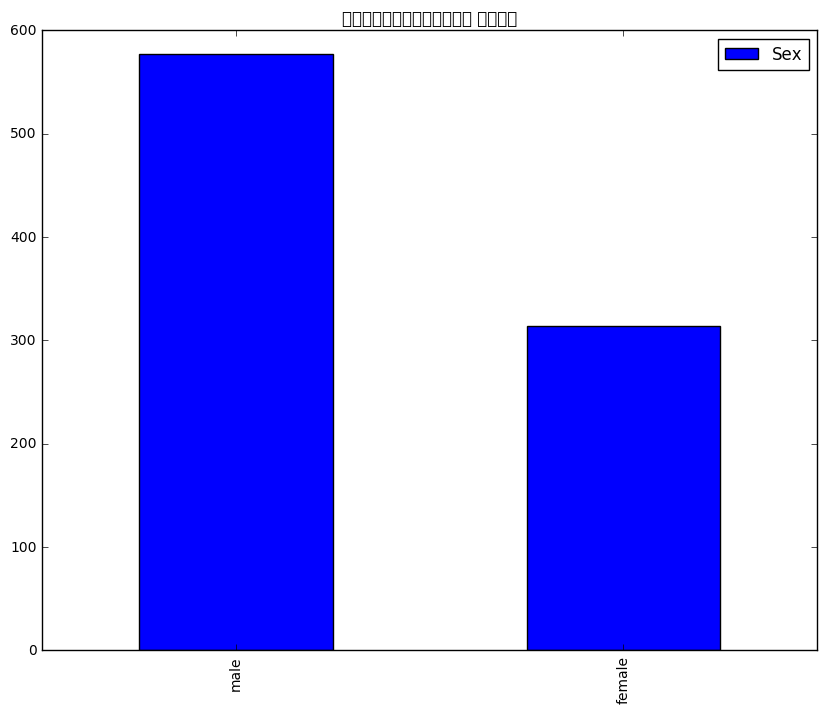

In [18]:
data.Sex.value_counts().plot(kind='bar',label = 'Sex')
plt.legend()
plt.title('Распределение пола');

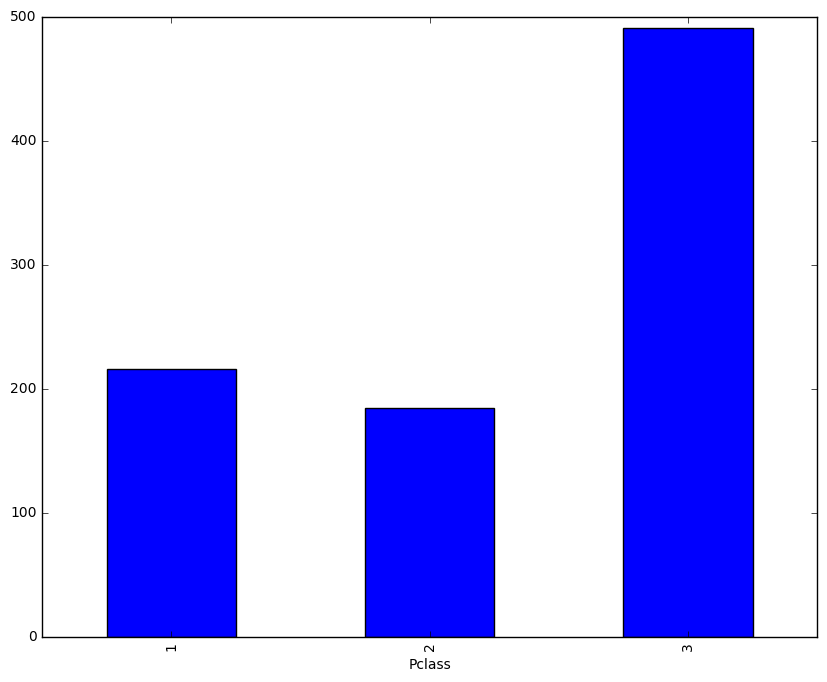

In [19]:
data.groupby(['Pclass'])['Name'].count().plot(kind = 'bar')

In [20]:
data[['Survived','Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891,0.383838,0.486592,0.00,0.000,0,1,1
Age,714,29.699118,14.526497,0.42,20.125,28,38,80


In [21]:
data['Survived'].sum()

342

выживших всего 38% или 342 человека

#### Задача 2 (1 балл). Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

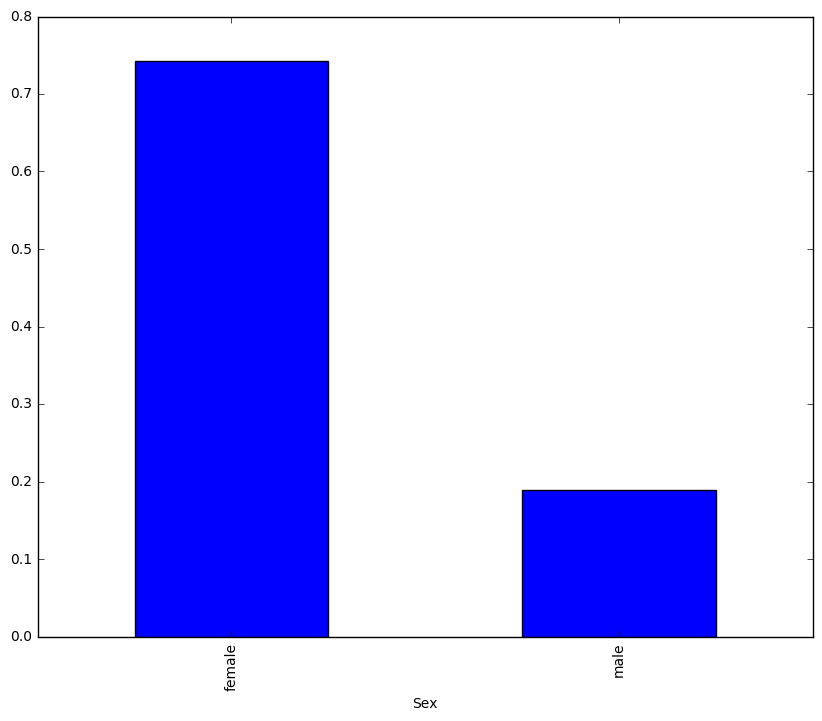

In [22]:
data.groupby(['Sex'])['Survived'].mean().plot(kind = 'bar')

In [23]:
Видим, что женщианы выживали чаще

SyntaxError: invalid syntax (<ipython-input-23-82f0dd606aac>, line 1)

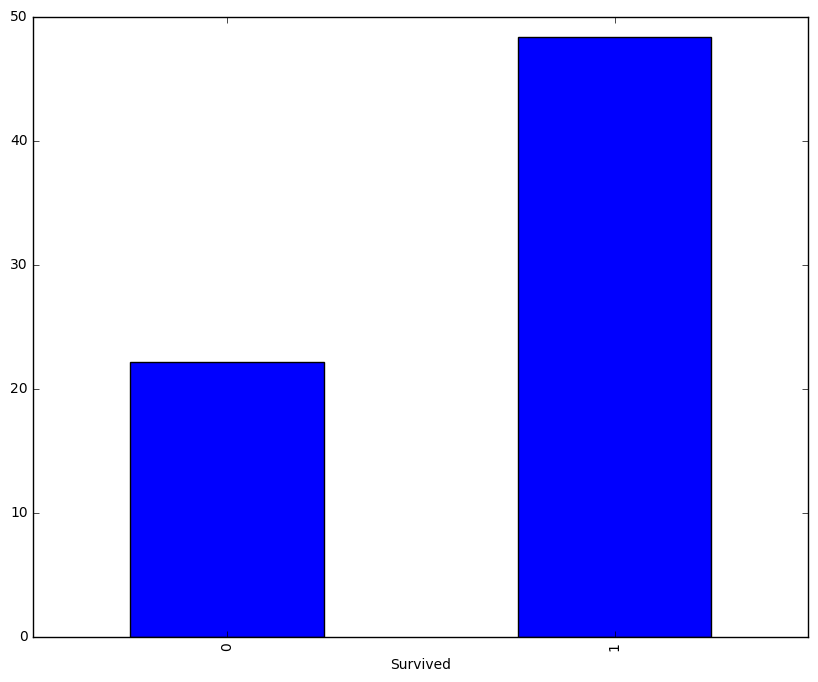

In [24]:
data.groupby(['Survived'])['Fare'].mean().plot(kind = 'bar')

In [25]:
Видим, что средняя стоимость билетов выживших выше

SyntaxError: invalid syntax (<ipython-input-25-54330c427c95>, line 1)

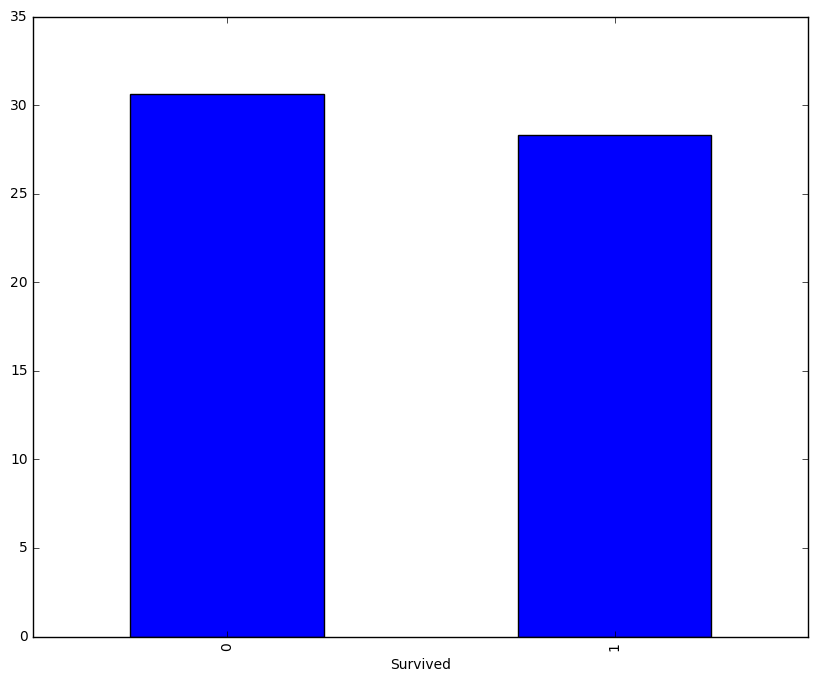

In [26]:
data.groupby(['Survived'])['Age'].mean().plot(kind = 'bar')

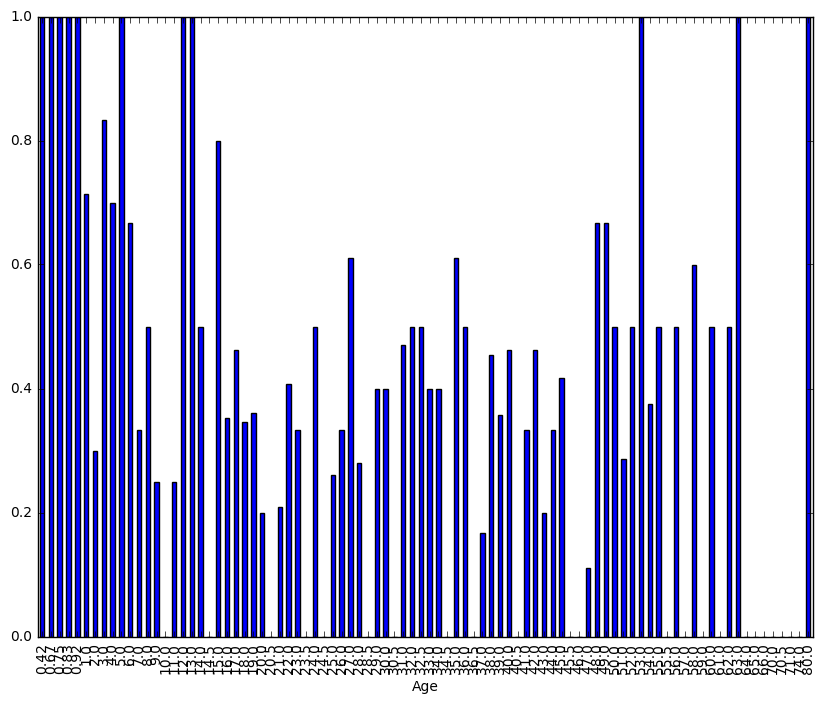

In [27]:
data.groupby(['Age'])['Survived'].mean().plot(kind = 'bar')

In [28]:
видим что выживший молодых примерно столько же сколько и старых

SyntaxError: invalid syntax (<ipython-input-28-076ab49f55ae>, line 1)

#### Задача 3 (1 балл). Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите их достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

In [29]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

видим, что есть пропуски в признаках Sex и Cabin и Embarked

Можно просто дропнуть строчки с пропущенными значениями,тогда мы не вносим свои эвристики,
некую априорную информацию в алгоритм
Но это уменьшит выборку и мы потеряем информацию, что может ухуджить результаты

In [30]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


Мы никогда не сможем понять что действительно должно стоять на месте пропуска и статистики лишь приближают значения. Считает статистику и заполняем ею все пропущенные значения

1) можно взять среднее, если данные не зашумленные, то это неплохой вариант.

2)можно взять медианну или любую другую квантиль, если данные зашумленные или из-за своих эвристических соображений

In [31]:
med = data['Age'].median()
data.ix[data.Age.isnull(), 'Age'] = med

3)можно взять усеченное среднее уровня(alpha), 0<alpha<1, отбрасиваем топ aplha значений с обоих краев выборки(самые шумные), для сильного шума можно взять первую и третью квартиль, и считаем по оставшимся элементам выборки среднее

4) можно взять моду и с самой большой вероятностью отгадаем

5) можно считать какие-нибудь вышеперечисленные статистики(или найти другие) через groupby по другим признакам(главное не таргету) например полу и проставить мальчикам без позраста свое среднее,а девочкам свое

6)можно построить регрессию, xgboost или любой другой алгоритм, который будет предсказывать признак, который содержит пропущенное значение, главное не переобучиться, для этого надо аккуратно по фолдам все делать.

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = data.ix[~data.Age.isnull(), data.columns != 'Age']
y = data.ix[~data.Age.isnull(), 'Age']
#lr.fit(X, y)
#agepred = np.maximum(lr.predict(data.ix[data.Age.isnull(), data.columns != 'Age']), data.Age.min())

надо проеобразовать некоторые признаки в численные и обучить модель, затем выбрать из предсказания и некоторой нижней границы минимального возраста

7)можно проставить им некое значение, которое выделяется в нашем признаке, например -9999, тогда древесный алгоритм сможет отдельно обработать информацию о пропусках

In [33]:
data['Cabin'].fillna(-1,inplace=True)

In [34]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Matplotlib

#### Задача 1 (1 балл). Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию $y(x)$, а также ее доверительный интервал в виде закрашенной зеленым цветом области от $y[i] - error[i]$ до $y[i] + error[i]$.

In [35]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

In [36]:
x, y, error = gen_uncertain_data()

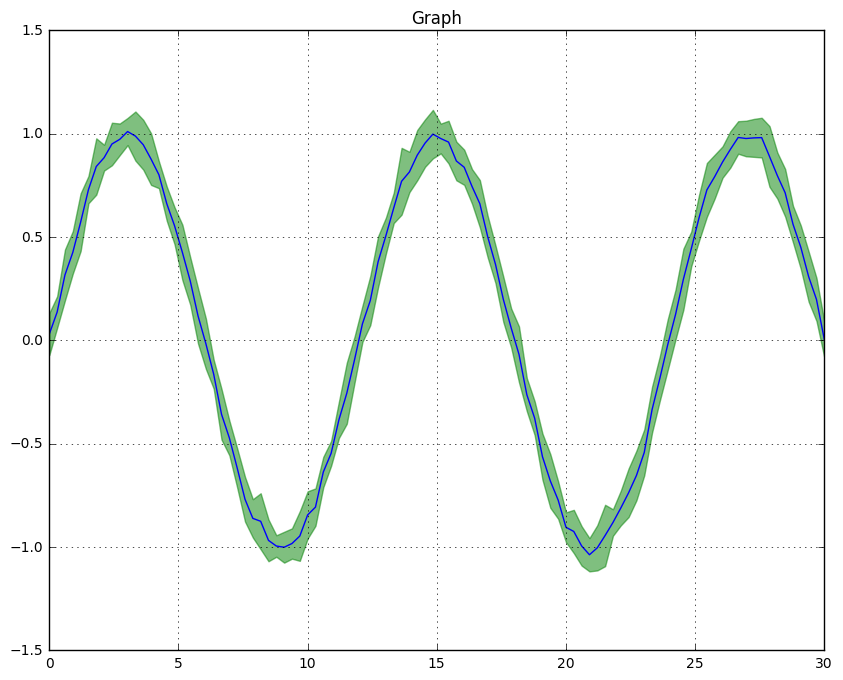

In [37]:
fig = plt.figure()
plt.plot(x, y, color='blue', linewidth=1.0)
plt.fill_between(x,y-error, y+error,color='g',alpha=.5)
plt.title('Graph')
plt.grid(True)

plt.show()

#### Задача 2 (1 балл). Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по $pandas$). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию $plt.subplots$. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры $figsize, sharey, sharex$ функции $plt.subplots$. Также полезными могут оказаться параметры $bins, normed$ функции $plt.hist$.

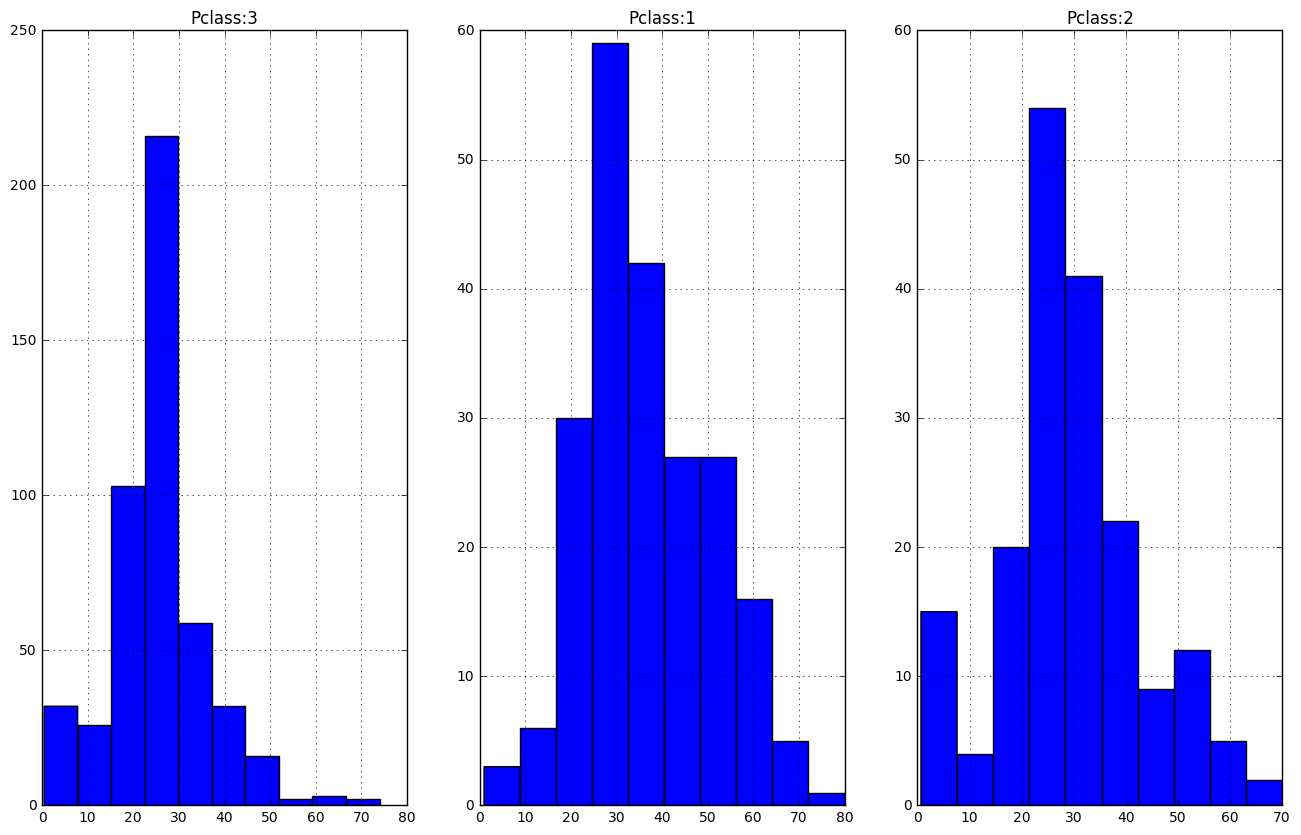

In [38]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
i=0
for col in  data['Pclass'].unique():
    axes[i].set_title('Pclass:'+str(col))
    data[data['Pclass']==col].Age.hist(ax=axes[i])
    i = i +1

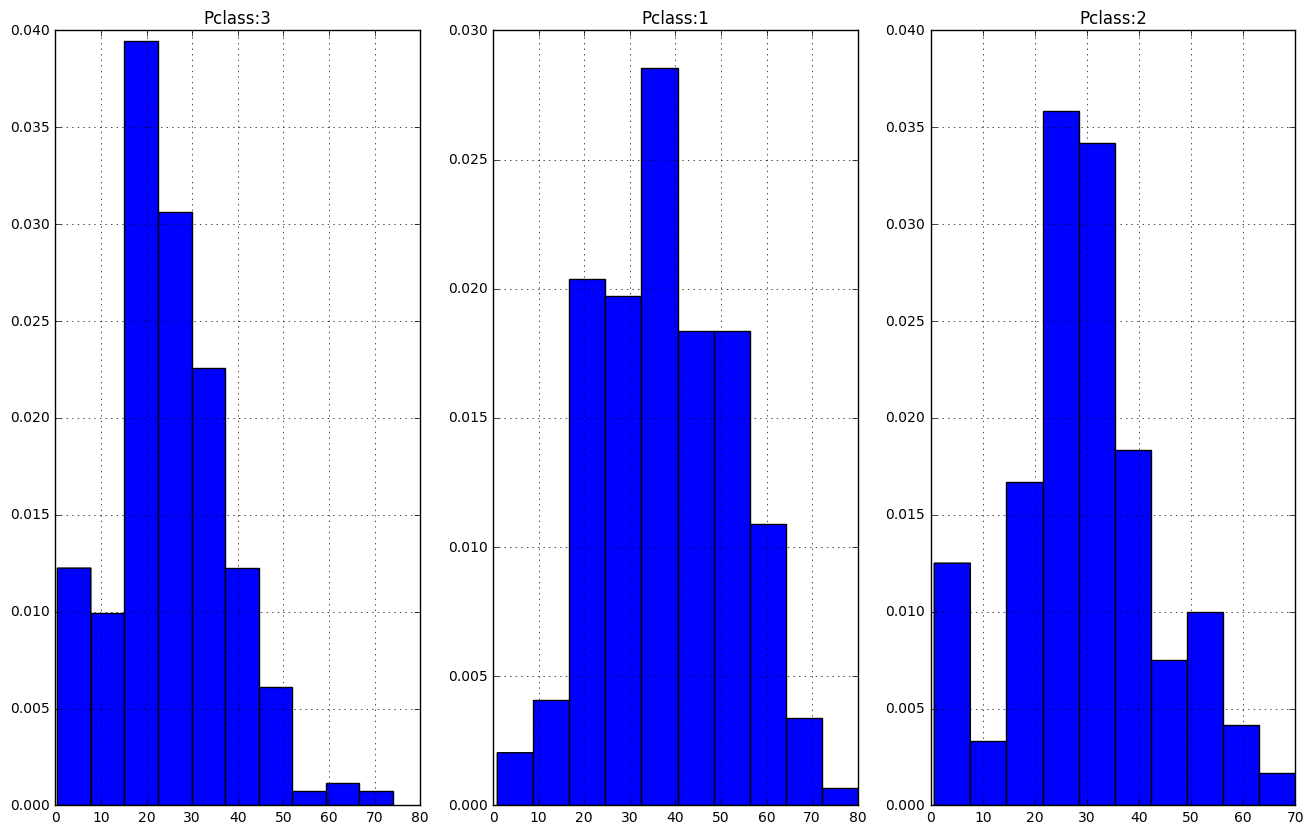

In [4]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
i=0
for col in  data['Pclass'].unique():
    axes[i].set_title('Pclass:'+str(col))
    data[data['Pclass']==col].Age.hist(ax=axes[i],normed = True)
    i = i +1